In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray


In [2]:

    # def memini(c,n):
    #     u=np.random.rand(c,n)
    #     colsum=u.sum(axis=0)
    #     nu=u/colsum[None,:]
    #     return nu
    # def distmatcal(data,v):
    #     ds=data.shape
    #     cs=v.shape
    #     const=0.0000001
    #     dist=np.zeros((ds[0],cs[0]))
    #     for i in range(ds[0]):
    #         for j in range(cs[0]):
    #             sum=0
    #             for k in range(ds[1]):  # this loop if for multidimensional vector coordinates
    #                 sum+=(data[i,k]-v[j,k])**2
    #             dist[i,j]=sum**0.5
    #     return dist+const

    # def updateu(v,m):
    #     dist_matrix=distmatcal(data,v)
    #     temp=dist_matrix**(-2/(m-1))
    #     sumtemp=temp.sum(axis=0)
    #     updatemem=temp/sum[None,:]
    #     return updatemen

    # def updatev(mf,data):
    #     mf=(np.transpose(mf))**2
    #     mfsum=mf.sum(axis=0)
    #     multiplication=np.dot(mf,data)
    #     v=multiplication/mfsum[None,:]
    #     return v

    # def train(data,c,m,epochs):
    #   n, d = data.shape
    #   Uinit = memini(n,c)
    #   u = Uinit
    #   OldDif = 0.0
    #   for i in range(epochs):
    #       mf=u**(m)
    #       v=updatev(u,data)
    #       dist_mat=distmatcal(data,v)
    #       unew=updateu(u,data)
    #       Dif = ((np.absolute(u-unew)).sum(axis=0)).sum()
    #       print("Itteration ", i, "Differnce", Dif )
    #       if (np.absolute(OldDif-Dif)<0.01):
    #           break
    #       OldDif = Dif
    #       u = unew
    #   return u, v

In [3]:
def InitMem(n,c):
  U = np.random.rand(n,c)
  Rsum = U.sum(axis=1)
  NU = U/Rsum[:, None]
  return NU

def UpdateMem(data,Cen,m):
  Dist_Mat = Distance_Mat(data,Cen)
  Temp = Dist_Mat**(-2/(m-1))
  SumTemp = Temp.sum(axis=1)
  UpdatedMem = Temp/SumTemp[:,None]
  return UpdatedMem

def Distance_Mat(data,Cen):
  DS = data.shape
  CS = Cen.shape
  eps = 0.000001
  Dist = np.zeros((DS[0],CS[0]))
  for i in range(DS[0]):
    for j in range(CS[0]):
      sum = 0
      for k in range(DS[1]):
        sum = sum + (data[i,k] - Cen[j,k])**2
      Dist[i,j]=sum**0.5
  return Dist + eps

def Distance_MatNew(data,Cen):
  DS = data.shape
  CS = Cen.shape
  eps = 0.000001
  Dist = np.zeros((DS[0],CS[0]))
  for j in range(CS[0]):
    Temp = Cen[j,:];
    Cenj = np.repeat(Temp,DS[0],axis = 0)
    Dist[:,j] = ((data - Cenj)**2).sum(axis=1)
  return Dist + eps

def Objective_Fun(mf,Dist_Mat):
  obj = np.multiply(mf,Dist_Mat)
  objvalue = (obj.sum(axis = 0)).sum()
  return objvalue

def UpdateCen(mf,data):
  mf = (mf.transpose())**2
  mfSum = mf.sum(axis = 1)
  MulUD = np.dot(mf,data)
  Cen = MulUD/mfSum[:,None]
  return Cen

def FCM(Data,c,m,MaxItter):
  n, d = Data.shape
  Uinit = InitMem(n,c)
  U = Uinit
  OldDif = 0.0
  for i in range(MaxItter):
    mf = U**(m)
    Cen = UpdateCen(mf,Data)
    Dist_Mat = Distance_Mat(Data,Cen)
    obj = Objective_Fun(mf,Dist_Mat)
    UNew = UpdateMem(Data,Cen,m)
    Dif = ((np.absolute(U-UNew)).sum(axis=1)).sum()
    print("Itteration ", i, "Differnce", Dif )
    if (np.absolute(OldDif-Dif)<0.01):
      break
    OldDif = Dif
    U = UNew
  return U, Cen

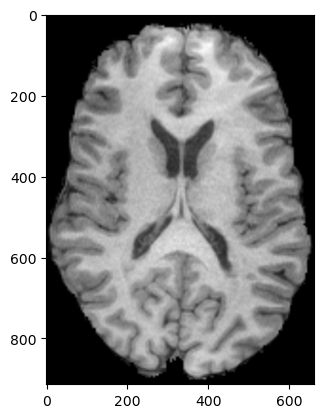

In [9]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
# testimage=img.imread('photoshop_created_image5.png')
testimage=img.imread('NewImg2_sir.jpg')
testimage2=img.imread('brain_mri.jpeg')
plt.imshow(testimage2,cmap='gray')
plt.show()

In [5]:
# converting to grayscale using open cv
import cv2
img_gray = cv2.cvtColor(testimage2, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Image', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
eps=0.00001
# upload image here from your drive
#image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgI.jpeg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#numpydata = asarray(image)
#data = numpydata.astype(float)
data = np.ravel(img_gray)
p = data.shape[0]
data = np.reshape(data,(p,1))
U,Cen = FCM(data,c=4,m=2,MaxItter=100)

Itteration  0 Differnce 274787.99053982843
Itteration  1 Differnce 40214.7625270656
Itteration  2 Differnce 128543.5905117083
Itteration  3 Differnce 213518.41611020733
Itteration  4 Differnce 236844.13428984766
Itteration  5 Differnce 240147.33970809955
Itteration  6 Differnce 255240.59067922708
Itteration  7 Differnce 114555.38114510335
Itteration  8 Differnce 61901.620582595686
Itteration  9 Differnce 36540.98474902431
Itteration  10 Differnce 22744.143410756722
Itteration  11 Differnce 15301.397134600085
Itteration  12 Differnce 10921.85326734619
Itteration  13 Differnce 8136.517426607699
Itteration  14 Differnce 6269.904934454418
Itteration  15 Differnce 4963.4198478583385
Itteration  16 Differnce 4015.599395720467
Itteration  17 Differnce 3303.3896240938766
Itteration  18 Differnce 2753.0997358004097
Itteration  19 Differnce 2319.325844949912
Itteration  20 Differnce 1969.464919234004
Itteration  21 Differnce 1683.156618688074
Itteration  22 Differnce 1445.782525907169
Itteration

(605068, 4)
(605068, 1)


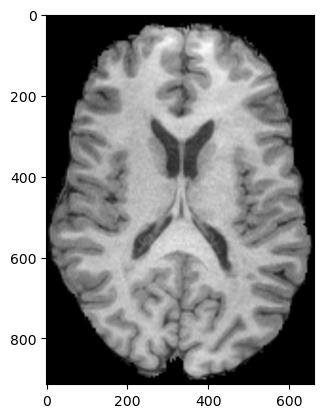

In [20]:
Umax = (U == U.max(axis=1)[:,None]).astype(int)
print(Umax.shape)
seg1 = Umax[:,0]
seg1 = np.reshape(seg1,img_gray.shape)
seg2 = Umax[:,1]
seg2 = np.reshape(seg2,img_gray.shape)
seg3 = Umax[:,2]
seg3 = np.reshape(seg3,img_gray.shape)
seg4 = Umax[:,3]
seg4 = np.reshape(seg4,img_gray.shape)
plt.imshow(img_gray,'gray')
print(data.shape)

In [39]:
seg1,seg2,seg3,seg4=sorted([seg1,seg2,seg3,seg4],key=lambda m: np.mean(m))

[]

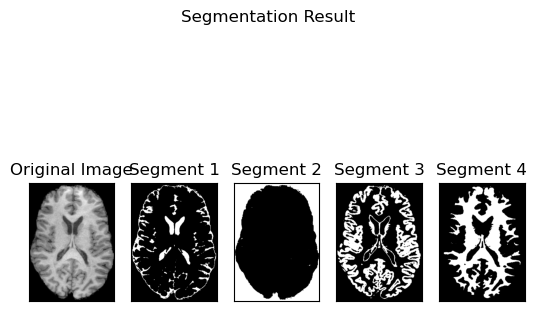

In [23]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(testimage2,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])

In [24]:
data = np.ravel(testimage)
p = data.shape[0]
data = np.reshape(data,(p,1))
U,Cen = FCM(data,c=4,m=2,MaxItter=100)

Itteration  0 Differnce 376192.4864825525
Itteration  1 Differnce 47827.09327229885
Itteration  2 Differnce 332555.2487687348
Itteration  3 Differnce 648187.4723135185
Itteration  4 Differnce 243464.3977886734
Itteration  5 Differnce 95786.71722384494
Itteration  6 Differnce 125470.66775220653
Itteration  7 Differnce 27219.356374184736
Itteration  8 Differnce 1018.9151004924519
Itteration  9 Differnce 87.11433003799372
Itteration  10 Differnce 8.437073737834831
Itteration  11 Differnce 0.849409367320941
Itteration  12 Differnce 0.08616100330377689
Itteration  13 Differnce 0.0087822529032877
Itteration  14 Differnce 0.0009000421086151406


(831250, 4)
(831250, 1)


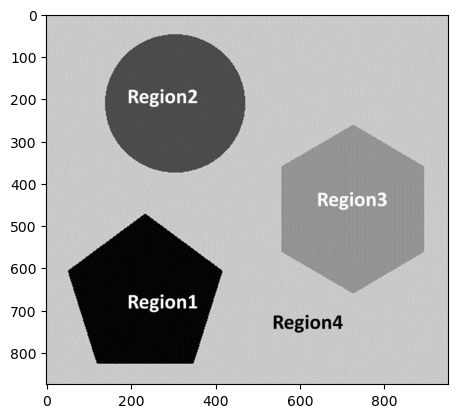

In [41]:
Umax = (U == U.max(axis=1)[:,None]).astype(int)
print(Umax.shape)
seg1 = Umax[:,0]
seg1 = np.reshape(seg1,testimage.shape)
seg2 = Umax[:,1]
seg2 = np.reshape(seg2,testimage.shape)
seg3 = Umax[:,2]
seg3 = np.reshape(seg3,testimage.shape)
seg4 = Umax[:,3]
seg4 = np.reshape(seg4,testimage.shape)
plt.imshow(testimage,'gray')
print(data.shape)

In [32]:
seg1,seg2,seg3,seg4=sorted([seg1,seg2,seg3,seg4],key=lambda m: np.mean(m))

[]

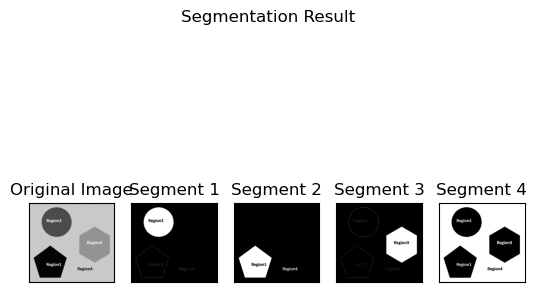

In [38]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(testimage,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])